<a href="https://colab.research.google.com/github/fozia-lucky/Thesis/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 41.8 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout
from keras.layers import Flatten

from keras.regularizers import L1L2
import keras_tuner as kt
from keras import regularizers


In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Fianldata.csv to Fianldata.csv


In [6]:
df = pd.read_csv("Fianldata.csv")
df

,Acc_X,Acc_Y,Acc_Z,class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
202821,-6.006237,-3.378271,4.406089,29
202822,-3.689065,-8.289723,3.665323,29
202823,-2.437402,-12.345160,0.565022,29
202824,-5.793968,-10.766126,-0.083198,29


In [7]:
df.describe()

,Acc_X,Acc_Y,Acc_Z,class
count,202826.000000,202826.000000,202826.000000,202826.000000
mean,-0.729198,-6.579332,2.057671,15.000000
std,3.512619,4.729316,3.478722,8.366621
min,-19.609110,-35.877113,-19.608511,1.000000
25%,-3.086447,-9.800968,-0.044006,8.000000
50%,-0.895058,-9.165539,0.872094,15.000000
75%,1.053164,-2.474632,2.961428,22.000000
max,19.607914,19.608511,18.631678,29.000000


In [12]:
#printing data properties
print("DF HEAD: ",df.head)
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)
#checking null value
print("DF ISNULL: ",df.isnull().sum())

DF HEAD:  <bound method NDFrame.head of            Acc_X      Acc_Y     Acc_Z  class
0       2.660984  -9.653030  0.470237      1
1       2.223091   2.223091  2.223091      1
2       2.098372  -9.481953  0.926070      1
3       2.716461  -9.739352  0.912008      1
4       2.288388  -9.371498  0.910390      1
...          ...        ...       ...    ...
202821 -6.006237  -3.378271  4.406089     29
202822 -3.689065  -8.289723  3.665323     29
202823 -2.437402 -12.345160  0.565022     29
202824 -5.793968 -10.766126 -0.083198     29
202825 -4.507253 -11.620029  1.723032     29

[202826 rows x 4 columns]>
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
class      int64
dtype: object
DF SHAPE:  (202826, 4)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
class    0
dtype: int64


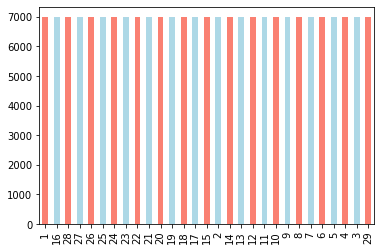

In [10]:
df["class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import plotly.express as px
dfv= df[["Acc_X","Acc_Y","Acc_Z"]]
dfbv=dfv.isnull().sum()


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(dfbv,title="Checking for Null values")

fig.show()

In [15]:
#dropping target column
X = df[["Acc_X","Acc_Y","Acc_Z"]]
#taking target column
y = df['class']
#df.head

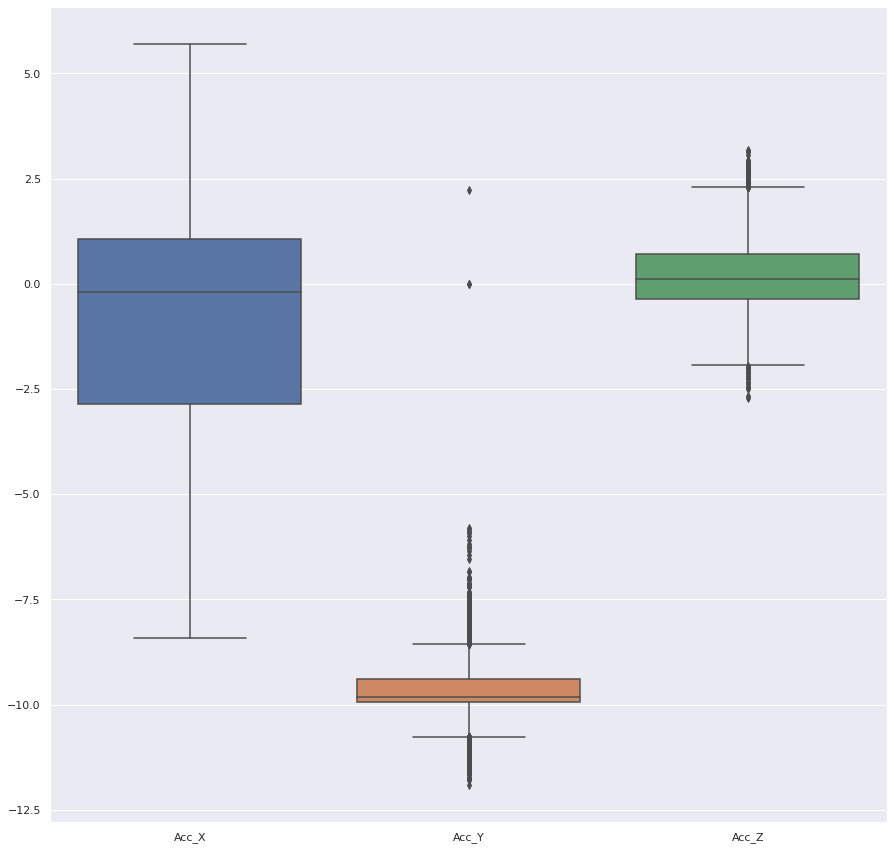

In [16]:
#boxplot for data with outliers
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")
#df.head
#print(df.iloc[0,0:6])

In [18]:
f=0
g=0
p=0

#finding first and last index of every class
ind=df.index.to_series().groupby(df['class']).agg(['first','last']).reset_index()
print(ind)

    class   first    last
0       1       0  142487
1       2    6348  142792
2       3   13037  142900
3       4   19923  143047
4       5   26770  143361
5       6   33450  143517
6       7   40288  145044
7       8   45755  146429
8       9   51364  147485
9      10   57302  149174
10     11   62607  150570
11     12   68205  151748
12     13   74021  152815
13     14   79948   86941
14     15   86942  157969
15     16   88782  158204
16     17   95541  158254
17     18  102485  162786
18     19  104947  163109
19     20  111618  163753
20     21  117968  166448
21     22  122267  169488
22     23  126221  174534
23     24  128169  179727
24     25  129970  184831
25     26  131860  189957
26     27  133728  193123
27     28  137556  196974
28     29  140699  202825


In [19]:
#detecting and replacing outliers by mean
for m in range(1,22):
    A = df.loc[df['class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        #print("For i=i.value")
        Avg= np.mean(A.iloc[:,i])
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                #print(newdf.iloc[ami,i])
                df.iloc[ami,i] = Avg
                #print(Avg)
                #print(newdf.iloc[ami,i])
                f=f+1
                #C= A.replace(((A.iloc[ami,i] < (Q1 - 1.5 * IQR)) |(A.iloc[:,i] > (Q3 + 1.5 * IQR))), Avg)
        print(f)
    if(p<20):
        p=p+1

(6994, 4)
0
142487
390
59660
(6994, 4)
6348
142792
59696
59704
(6994, 4)
13037
142900
66615
70118
(6994, 4)
19923
143047
122753
219618
(6994, 4)
26770
143361
281039
298673
(6994, 4)
33450
143517
299526
299606
(6994, 4)
40288
145044
301053
302550
(6994, 4)
45755
146429
305362
308187
(6994, 4)
51364
147485
312051
315865
(6994, 4)
57302
149174
361704
363232
(6994, 4)
62607
150570
364628
367390
(6994, 4)
68205
151748
369964
370983
(6994, 4)
74021
152815
413004
428883
(6994, 4)
79948
86941
428883
428883
(6994, 4)
86942
157969
430204
430204
(6994, 4)
88782
158204
435318
456246
(6994, 4)
95541
158254
486900
507878
(6994, 4)
102485
162786
507878
507878
(6994, 4)
104947
163109
512685
538518
(6994, 4)
111618
163753
543961
570033
(6994, 4)
117968
166448
570033
570033


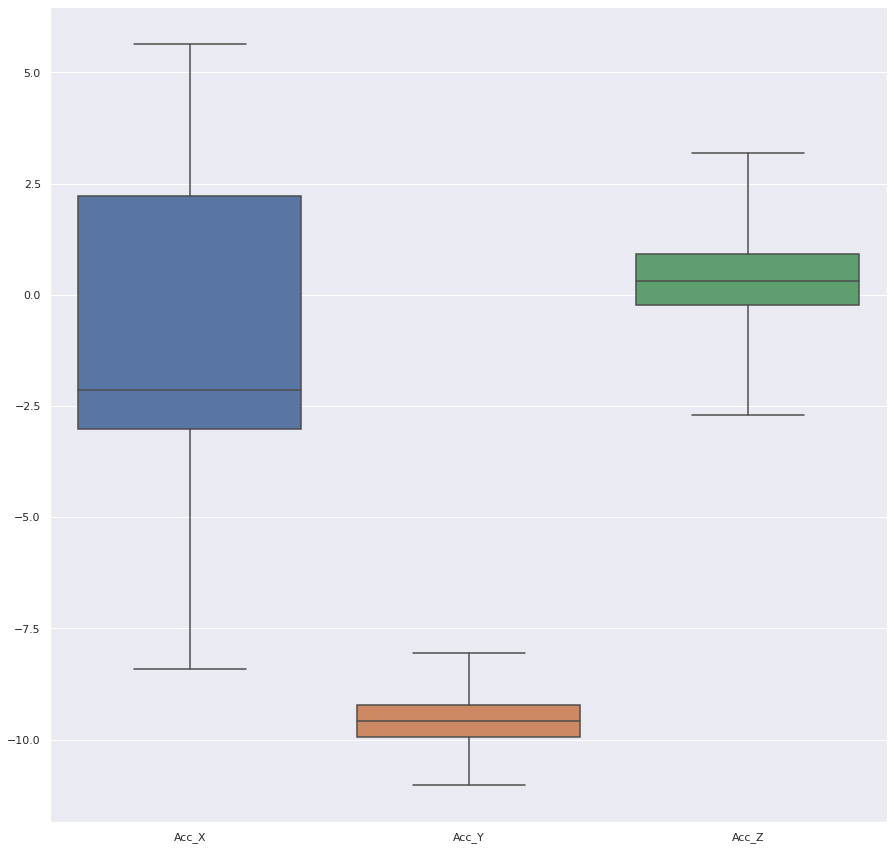

In [20]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers(Final Har_intensity).png")

In [23]:
B=df

In [24]:
#defining properties for LSTM
N_TIME_STEPS = 10
N_FEATURES = 3
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(B) - N_TIME_STEPS, step):
    accxs = B['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = B['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = B['Acc_Z'].values[i: i + N_TIME_STEPS]
    label = stats.mode(B['class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs]) # acczs,
    labels.append(label)
    
#print("SEGMENTS: ",segments)
#print("LABELS: ",labels)
print("SEGMENTS SHAPE: ",np.array(segments).shape)
print("LABELS SHAPE: ",np.array(labels).shape)
#pd.get_dummies(labels)  

SEGMENTS SHAPE:  (202816, 3, 10)
LABELS SHAPE:  (202816,)
